<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>SOLUTIONS:Recognizing Hand Written digits</H1></u></center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
np.random.seed(seed=2017)
%matplotlib inline

### 1) Load the dataset digits from Sklearn.datasets and show the content of the row number 128, including the image and the target label.

In [2]:
digits = load_digits()
img_lbl = list(zip(digits.images, digits.target))
img_lbl[128]

(array([[  0.,   0.,   1.,  11.,  15.,   8.,   0.,   0.],
        [  0.,   0.,  12.,  14.,  10.,  16.,   5.,   0.],
        [  0.,   0.,  16.,   7.,  13.,  16.,   4.,   0.],
        [  0.,   0.,   9.,  15.,  13.,  16.,   4.,   0.],
        [  0.,   0.,   0.,   0.,   1.,  15.,   4.,   0.],
        [  0.,   0.,   0.,   0.,   0.,  16.,   4.,   0.],
        [  0.,   8.,  16.,  14.,   9.,  16.,   4.,   0.],
        [  0.,   0.,   2.,  10.,  15.,  15.,   2.,   0.]]), 9)

### 2) Calculate the lenght of the dataset. How many images are in this dataset?

In [3]:
n_samples = len(digits.images)
n_samples

1797

### 3) Show the images for the first 8 values and also their corresponding labels.

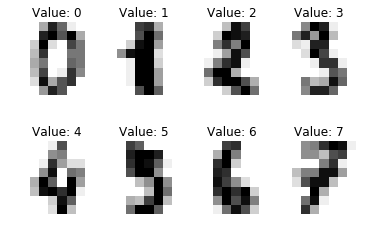

In [10]:
for index, (image, label) in enumerate(img_lbl[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Value: %i' % label)  

### 4) Stardardize the data and create the test and training datasets

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   test_size=0.2, random_state=2017)

In [14]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 5) Train different classifiers: Decision Tree, AdaBoost, Support Vector Machines and Multilayer Perceptron

## Evaluating with Classifiers:

In [16]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [84]:
svm_cls = svm.SVC(kernel='rbf',gamma=0.1,C=1)
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000,
                         learning_rate=0.01, random_state=0)
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic',max_iter=500)

In [85]:
ada.fit(X_train_std, y_train)
svm_cls.fit(X_train_std, y_train)
mlp.fit(X_train_std, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

### 6) Evaluate all classifiers with the accuracy metric for the test and train datasets

In [86]:
print("Training set score Adaboost: %f" % ada.score(X_train_std, y_train))
print("Training set score Support Vector Machines: %f" % svm_cls.score(X_train_std, y_train))
print("Training set score MLP: %f" % mlp.score(X_train_std, y_train))


Training set score Adaboost: 0.987474
Training set score Support Vector Machines: 1.000000
Training set score MLP: 1.000000


In [87]:
print("Test set score Adaboost: %f" % ada.score(X_test_std, y_test))
print("Test set score Support Vector Machines: %f" % svm_cls.score(X_test_std, y_test))
print("Test set score MLP: %f" % mlp.score(X_test_std, y_test))

Test set score Adaboost: 0.927778
Test set score Support Vector Machines: 0.972222
Test set score MLP: 0.983333


### 7) Print the classification report and confusion matrix for Multilayer Perceptron Model

In [89]:
print("Classification report:\n%s\n"
      % (classification_report(y_test, mlp.predict(X_test_std))))
print("Confusion matrix:\n%s" % (confusion_matrix(y_test, mlp.predict(X_test_std))))

Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.95      0.98      0.96        41
          2       0.98      1.00      0.99        45
          3       0.96      0.96      0.96        26
          4       1.00      1.00      1.00        32
          5       1.00      0.98      0.99        46
          6       0.97      1.00      0.98        29
          7       1.00      1.00      1.00        42
          8       1.00      0.91      0.96        35
          9       0.97      1.00      0.98        30

avg / total       0.98      0.98      0.98       360


Confusion matrix:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  1]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  1 25  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  2  0  1  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0

### 8) Show the first 8 images in the test dataset with their corresponding labels and predictions.

In [95]:
y_pred = mlp.predict(X_test_std)
img_pred = list(zip(X_test.reshape(-1,8,8), y_pred, y_test))
for index, (image, prediction, label) in enumerate(img_pred[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: {}\n Label:{}'.format(prediction,label))
plt.show()